In [3]:
import os
import sys
import shutil
import dotenv
from   dotenv import find_dotenv, load_dotenv
import matplotlib
load_dotenv(find_dotenv())
PATH_P     = os.environ['PATH_P']
os.chdir(PATH_P)
sys.path.insert(0, PATH_P)
import pandas as pd
from src.dst.outputhandler.pickle import tic,toc,pickle_save_,pickle_load
from src.dst.plots.plots import plotting_tool,retrieve_data,SeabornFig2Grid
from src.visualization.vis_LSTM_p.main import main_visualize
import  numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from src.visualization.vis_LSTM_p.main import main_visualize
from src.models.CMA_ES.CMA_ES import CMA_ES

## experiments

In [4]:
path                                  =  './models/segmentated_shuffle/bayes_opt/DEEP2/'
RD                                    = retrieve_data()
data,dict_,path_best,hist             = RD.get_best_D1(path)
data['df_t_val_train']                = pd.concat([data['df_t_train'],data['df_t_val']])
AUC_v_a                               = RD.get_all(path,'AUC_v')

val_loss_a                            = RD.get_all(path,'val_f')
dict_['AUC_v']                        = data['AUC_v']

RD.print_dict(dict_)

str_list                              = data['path_o'].split('/')
data['path_o']                        = path_best
BO_vis                                = plotting_tool(dict_)

lr           : 0.001267345303142497
time_dim     : 20
encoder      : [240, 443]
decoder      : [470]
vector       : 240
AUC_v        : 0.7134902394733854


In [5]:
def return_dict():
    dict_c = {
        'path_i'   : './models/bayes_opt/DEEP2/',
        'path_save': './models/CMA_ES/DEEP2/',

        'resolution_AUC': 1000,

        ###### CMA_ES    ######
        'CMA_ES': True,
        'verbose_CMA': 1,
        'verbose_CMA_log': 0,
        'evals': 21*150,
        'bounds': [-100., 100.],
        'sigma': 0.4222222222222225,
        'progress_ST': 0.3,
        'popsize'    : 21,
        
        'mode'       : 'linear',

        'epoch': 0

    }

    return dict_c

## plus min sigmoid

In [6]:
dict_c = return_dict()
dict_c['mode']   = 'sigmoid'
dict_c['bounds'] = [-100,100]
path   = path_best.replace('bayes_opt','CMA_ES/pos_min_sigmoid')
# CMA_ES(dict_c).main(data,path,dict_)

In [7]:
df    = pickle_load(path+'best/df.p', None)
data  = pickle_load(path+'best/data_best.p', None)
dict_ = pickle_load(path+'dict.p', None)

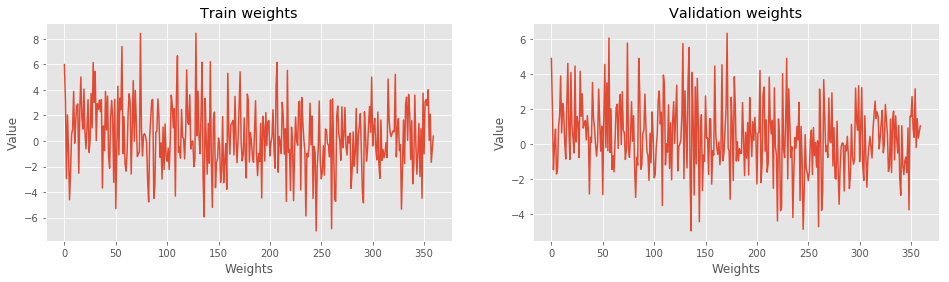

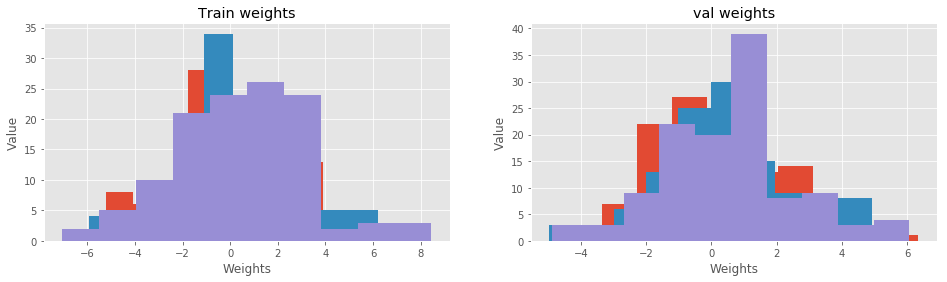

In [8]:
BO_vis.plot_weigths(data['x_tr'],data['x_v'])

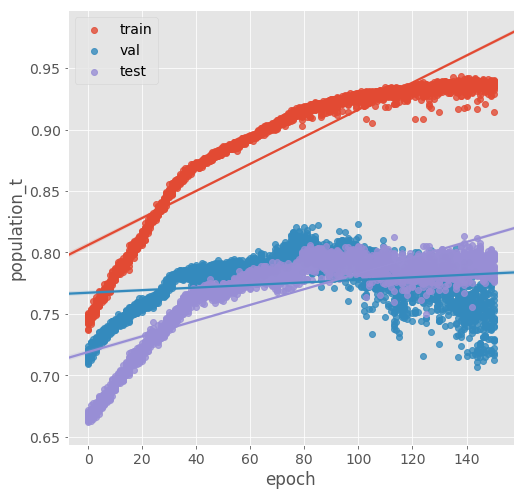

In [13]:
# Set up the figure
import matplotlib
matplotlib.rcParams.update({'font.size': 14})
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.regplot(df.epoch, df.population_tr,label = 'train')
ax = sns.regplot(df.epoch, df.population_v,label = 'val')
ax = sns.regplot(df.epoch, df.population_t,label = 'test')
plt.legend()
plt.savefig('./plots/AFE/CMA_min_training.png',bbox_inches="tight")

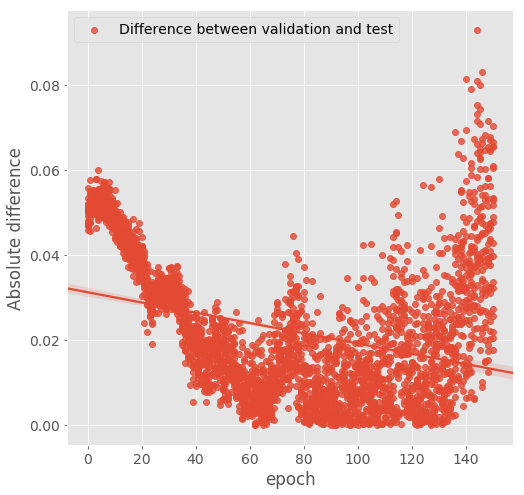

In [14]:
import matplotlib
matplotlib.rcParams.update({'font.size': 14})
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.regplot(df.epoch, df.abs_diff_tv,label = 'Difference between validation and test')
plt.legend()
plt.ylabel('Absolute difference')
plt.savefig('./plots/AFE/CMA_min_diff.png',bbox_inches="tight")

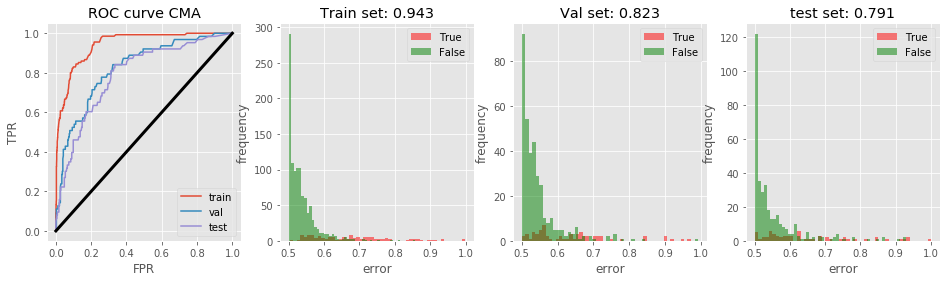

In [34]:
BO_vis.plot_cma(data)

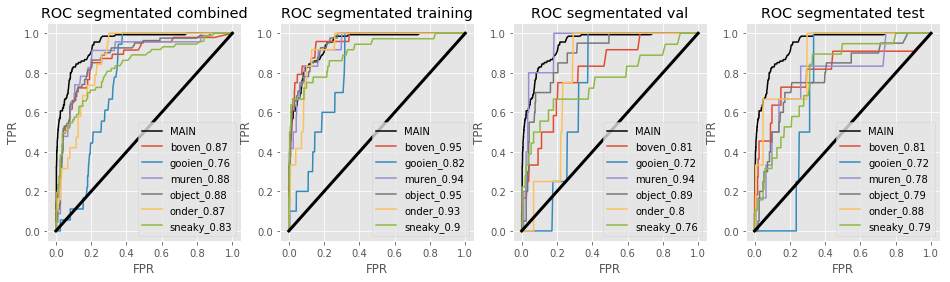

In [35]:
data['path_o'] = data['dict_config']['path_save']
BO_vis.save_ROC_segment(data,'segmentation',cma = True)

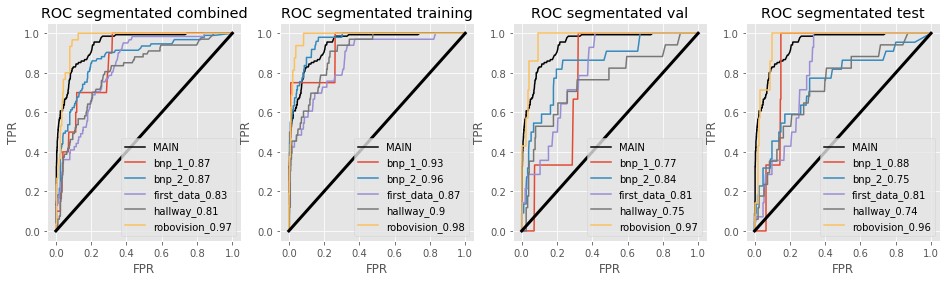

In [36]:
data['path_o'] = data['dict_config']['path_save']
BO_vis.save_ROC_segment(data,'location',cma = True)

## plus sigmoid

In [17]:
dict_c = return_dict()
dict_c['mode']   = 'sigmoid'
dict_c['bounds'] = [0,100]
path   = path_best.replace('bayes_opt','CMA_ES/pos_sigmoid')
# CMA_ES(dict_c).main(data,path,dict_)

In [18]:
df    = pickle_load(path+'best/df.p', None)
data  = pickle_load(path+'best/data_best.p', None)
dict_ = pickle_load(path+'dict.p', None)

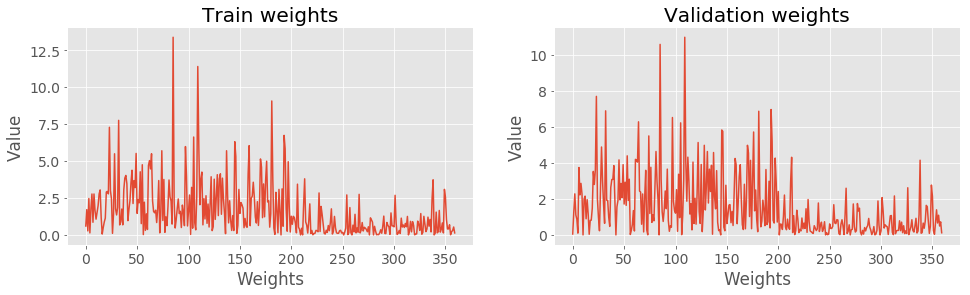

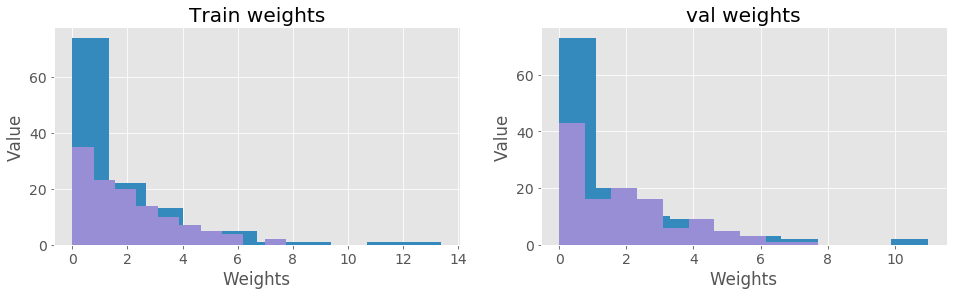

In [19]:
BO_vis.plot_weigths(data['x_tr'],data['x_v'])

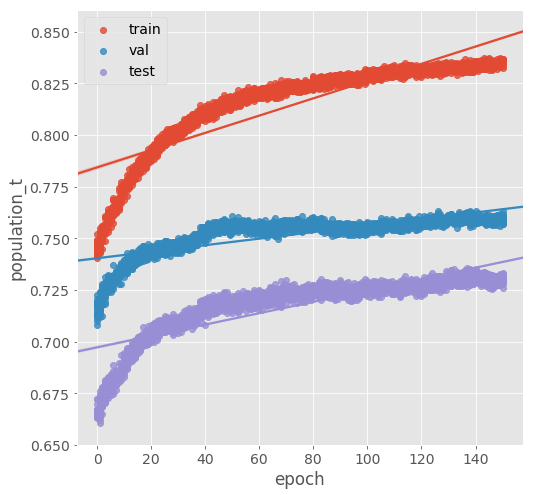

In [20]:
# Set up the figure
import matplotlib
matplotlib.rcParams.update({'font.size': 14})
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.regplot(df.epoch, df.population_tr,label = 'train')
ax = sns.regplot(df.epoch, df.population_v,label = 'val')
ax = sns.regplot(df.epoch, df.population_t,label = 'test')
plt.legend()
plt.savefig('./plots/AFE/CMA_pos_training.png',bbox_inches="tight")

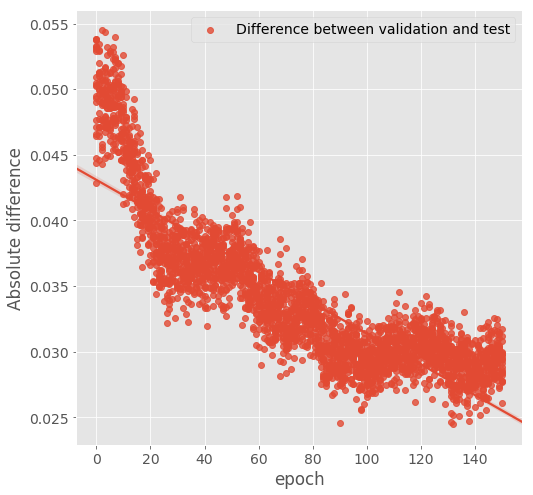

In [21]:
import matplotlib
matplotlib.rcParams.update({'font.size': 14})
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.regplot(df.epoch, df.abs_diff_tv,label = 'Difference between validation and test')
plt.legend()
plt.ylabel('Absolute difference')
plt.savefig('./plots/AFE/CMA_pos_diff.png',bbox_inches="tight")

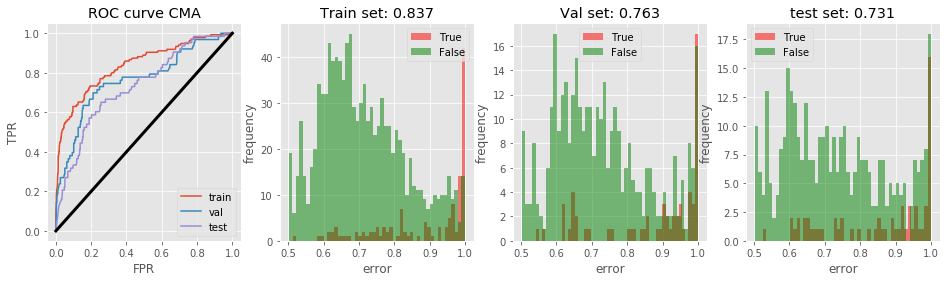

In [42]:
BO_vis.plot_cma(data)

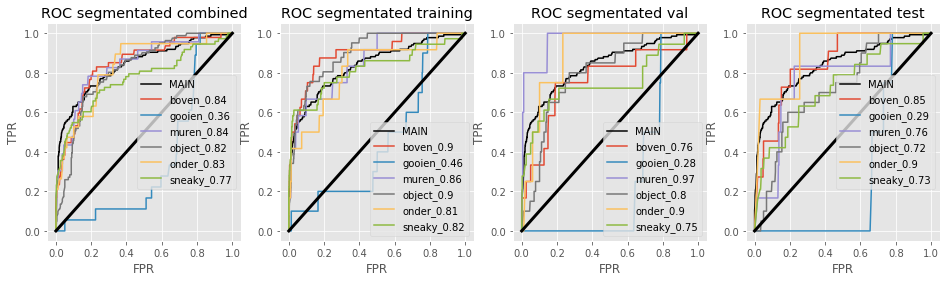

In [43]:
data['path_o'] = data['dict_config']['path_save']
BO_vis.save_ROC_segment(data,'segmentation',cma = True)

In [ ]:
data['path_o'] = data['dict_config']['path_save']
BO_vis.save_ROC_segment(data,'location',cma = True)